## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed
rseed = 42

## Load and explore data

In [3]:
# Import the dataset
df = pd.read_csv('Country-data.csv',index_col=0)

In [4]:
# Check the shape
df.shape

(167, 9)

In [5]:
# Check datatypes & counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [6]:
# Get descriptive statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Identify any missing data
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no missing data

## Preprocessing and Feature Selection

In [8]:
# Drop any non-numeric features (columns)
df.head()
# There are no non-numeric features

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


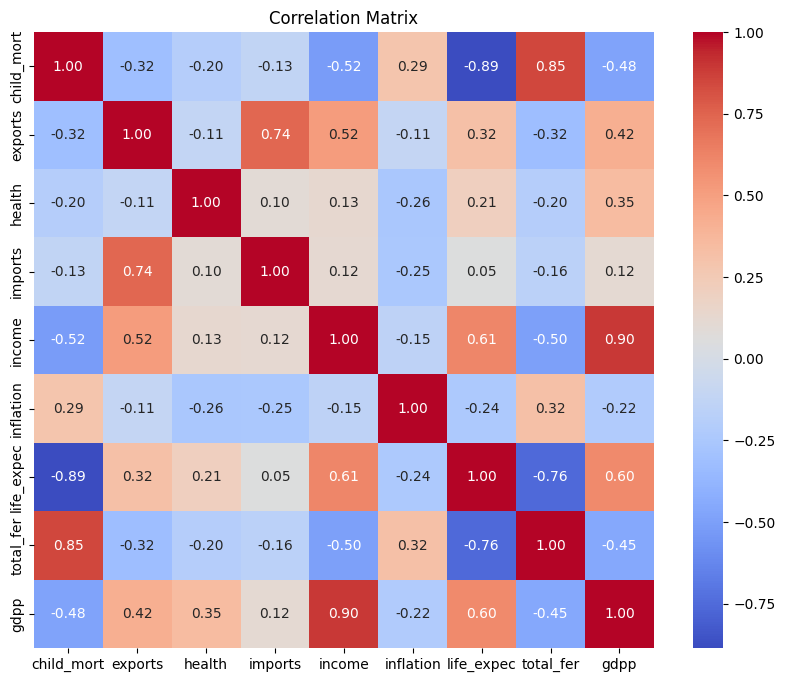

In [9]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
correlation_map = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_map, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The heatmap shows that there is a strong positive correlation between gdpp and income, and child_mort and total_fer, and a strong negative correlation between child_mort and life_expec.

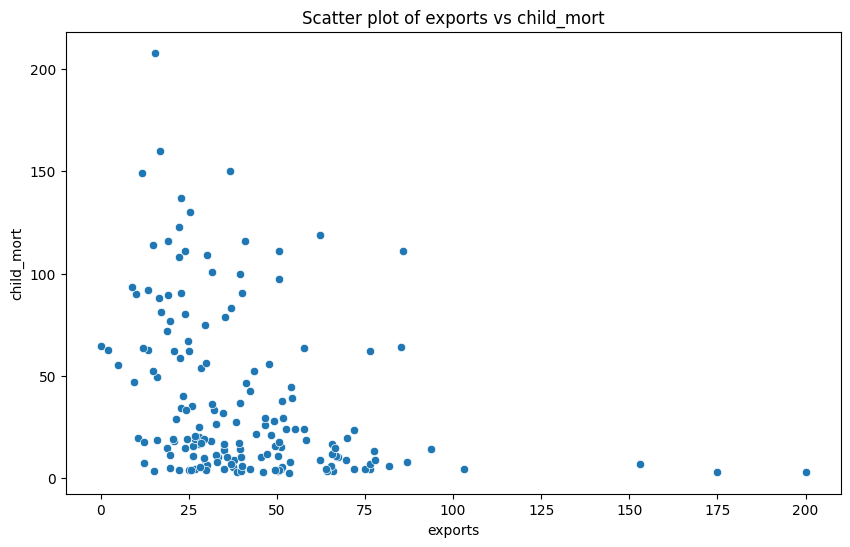

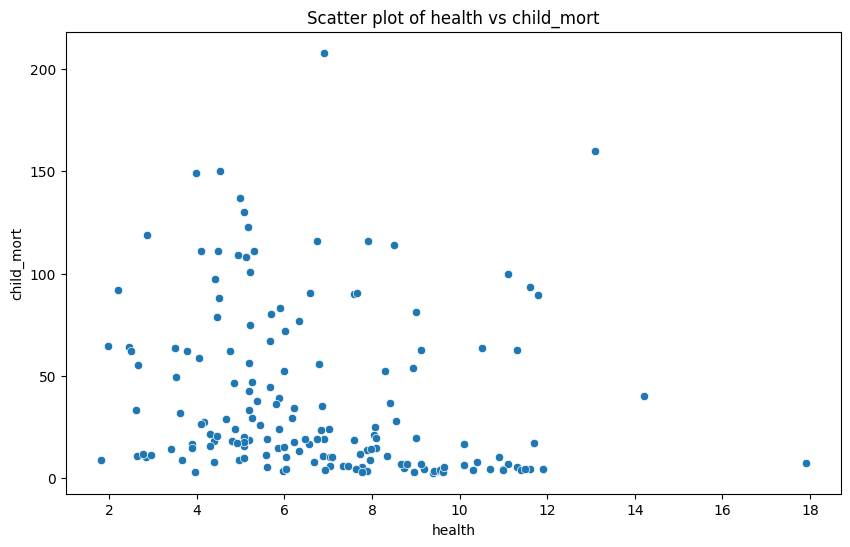

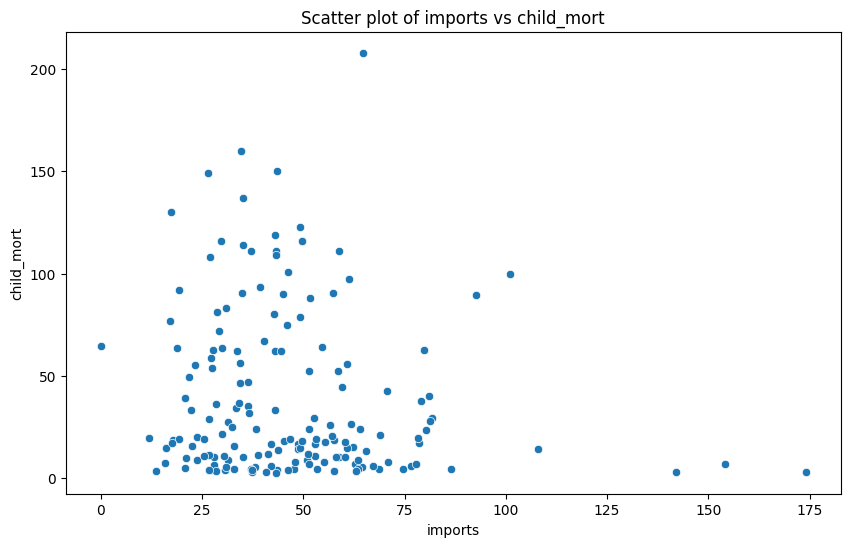

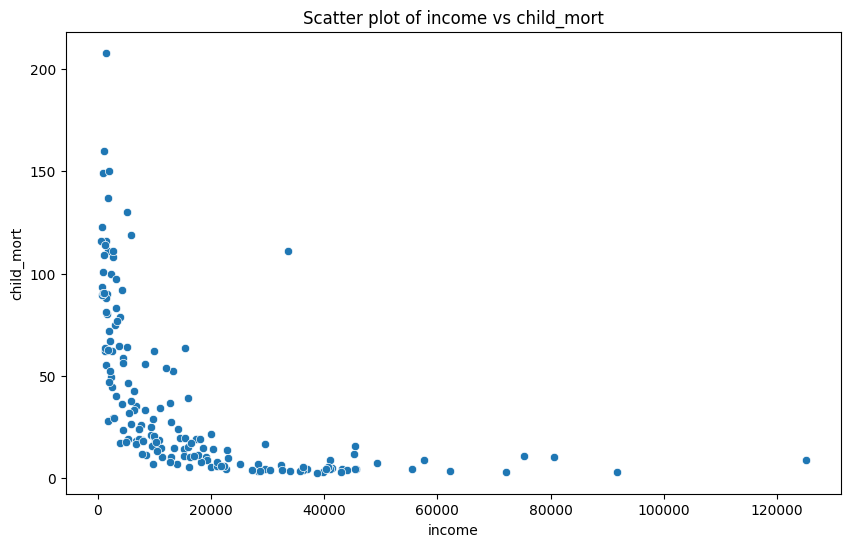

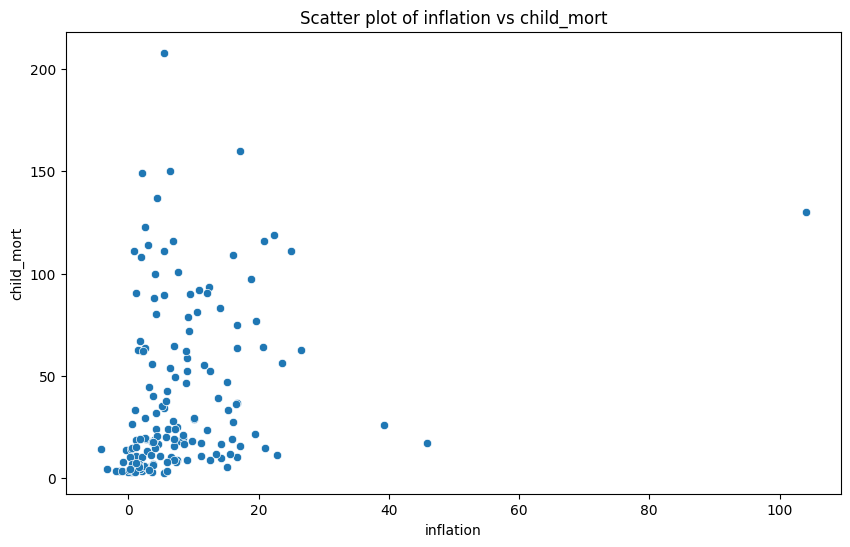

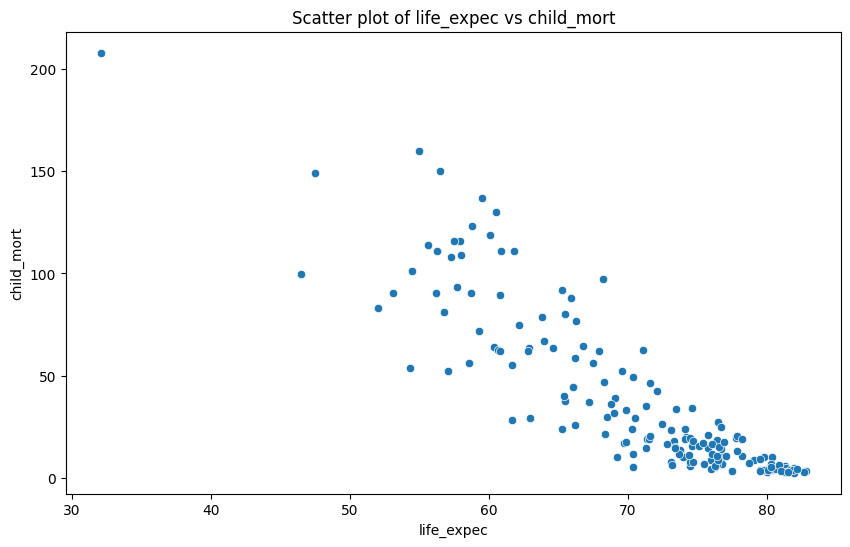

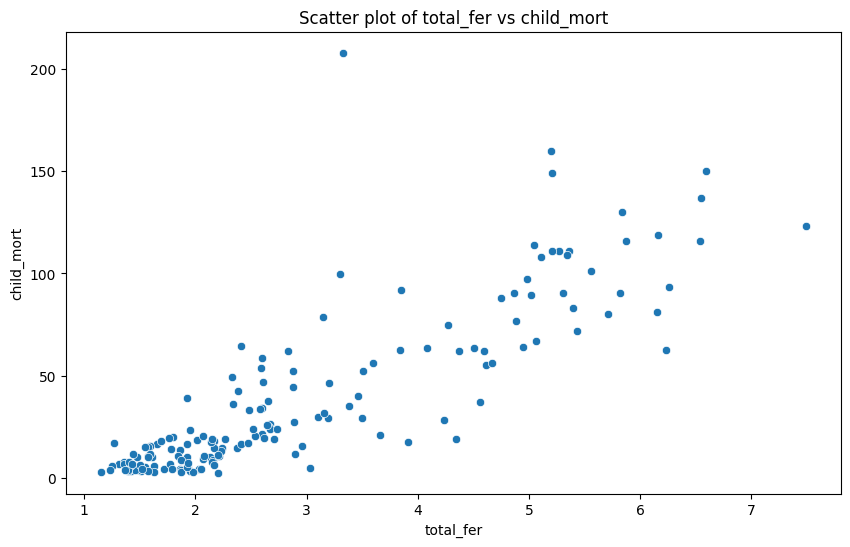

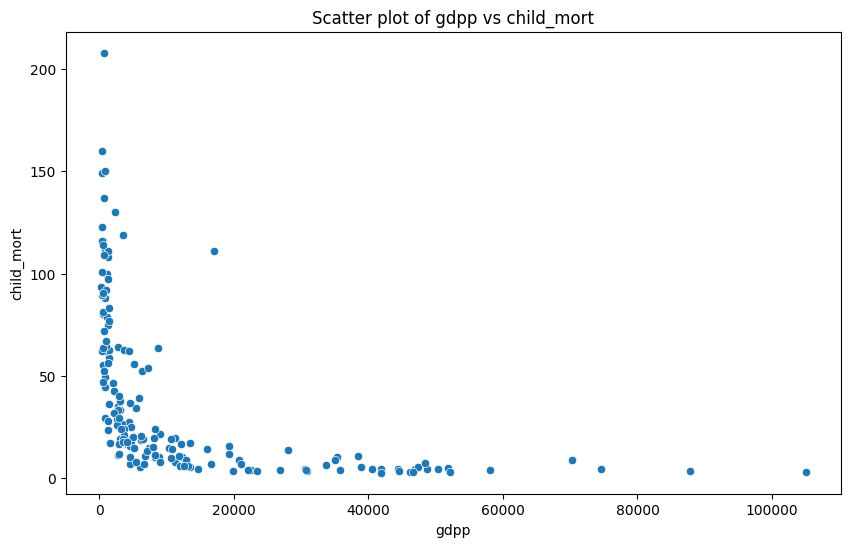

In [10]:
# Explore the continuous independent features against child_mort using scatter plots.

# List of continuous variables to plot against 'child_mort'
continuous_vars = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Create scatterplots
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=var, y='child_mort')
    plt.title(f'Scatter plot of {var} vs child_mort')
    plt.xlabel(var)
    plt.ylabel('child_mort')
    plt.show()

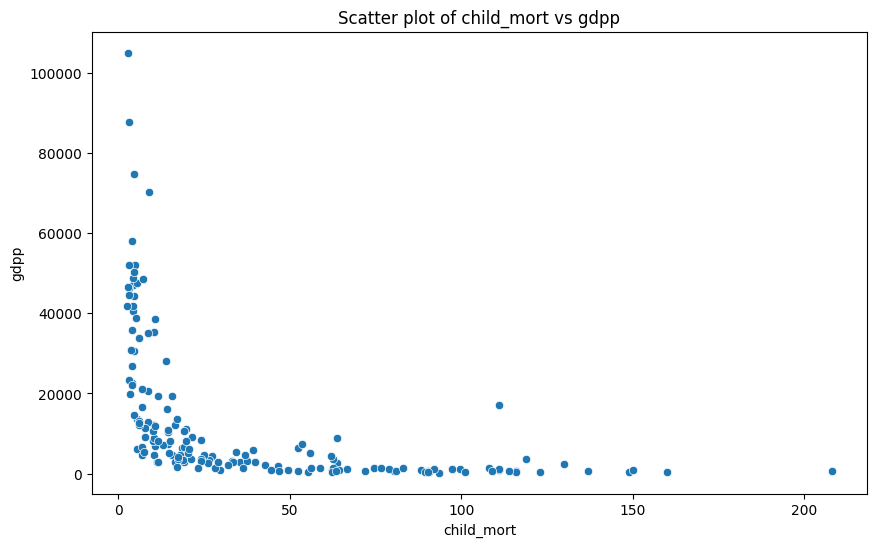

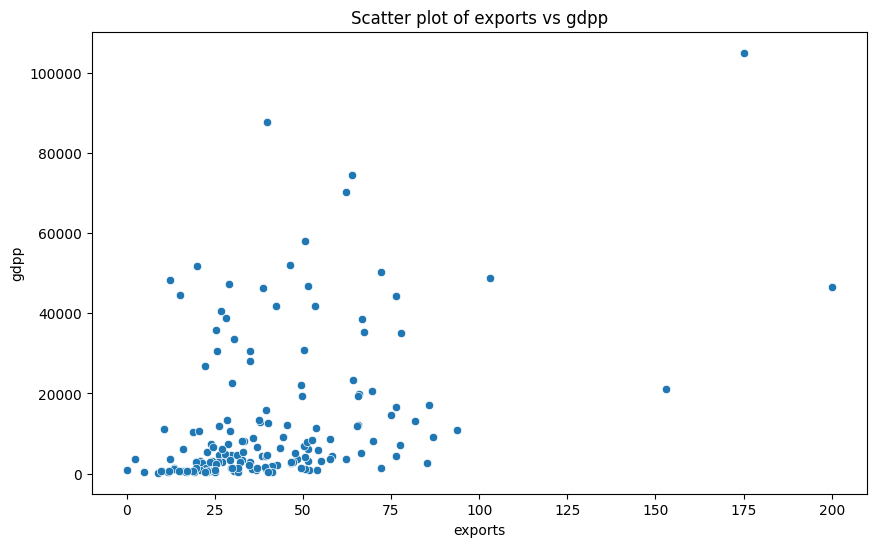

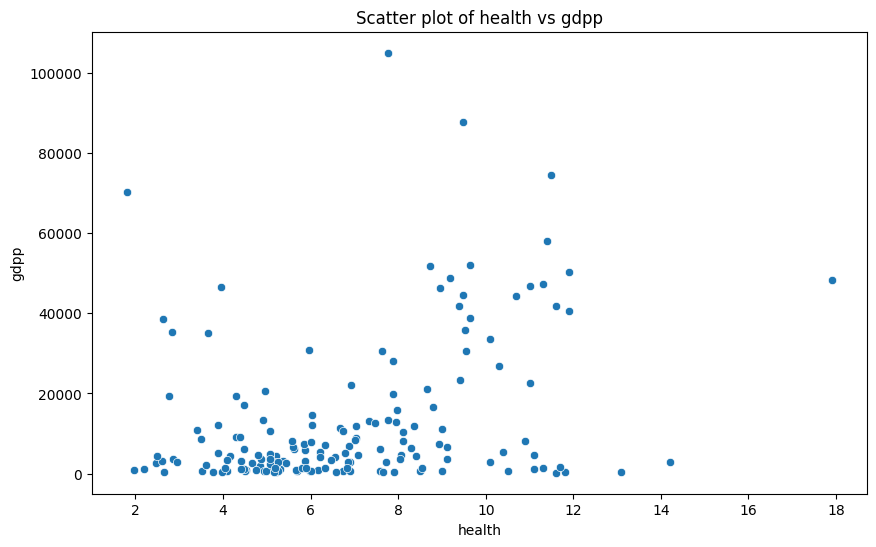

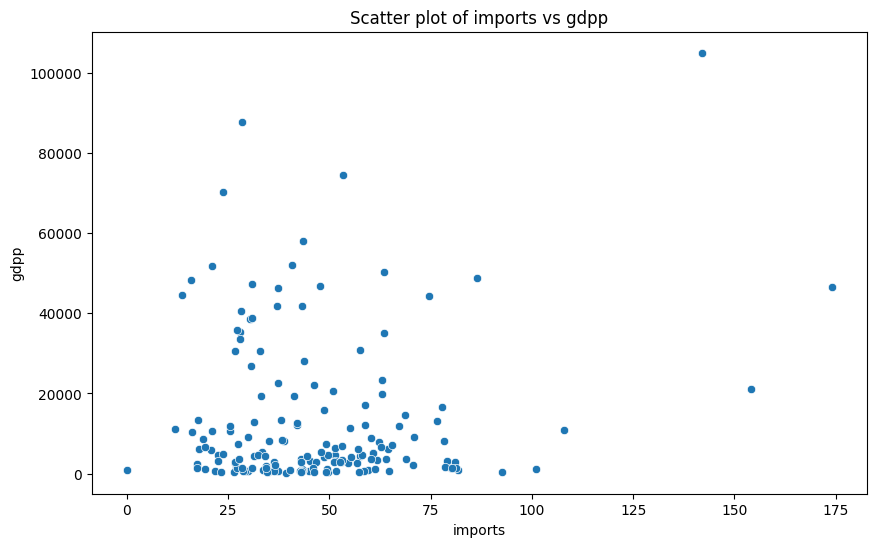

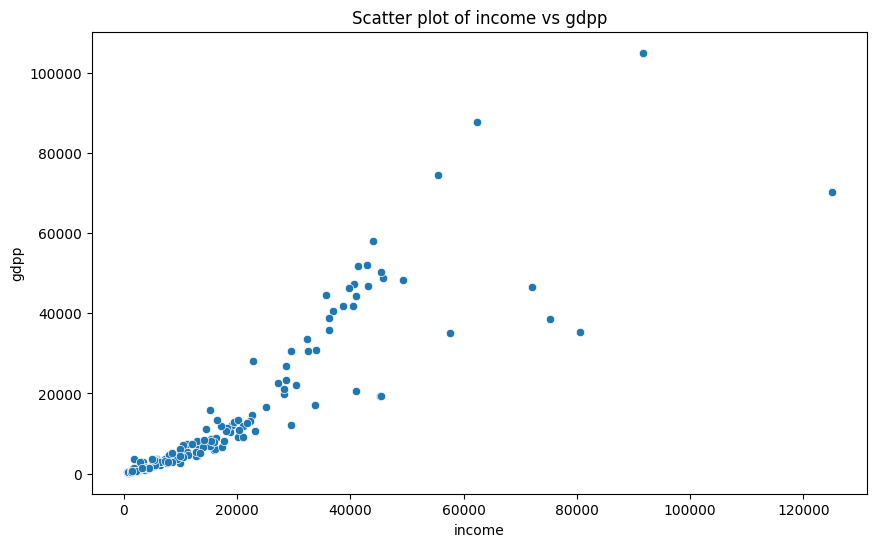

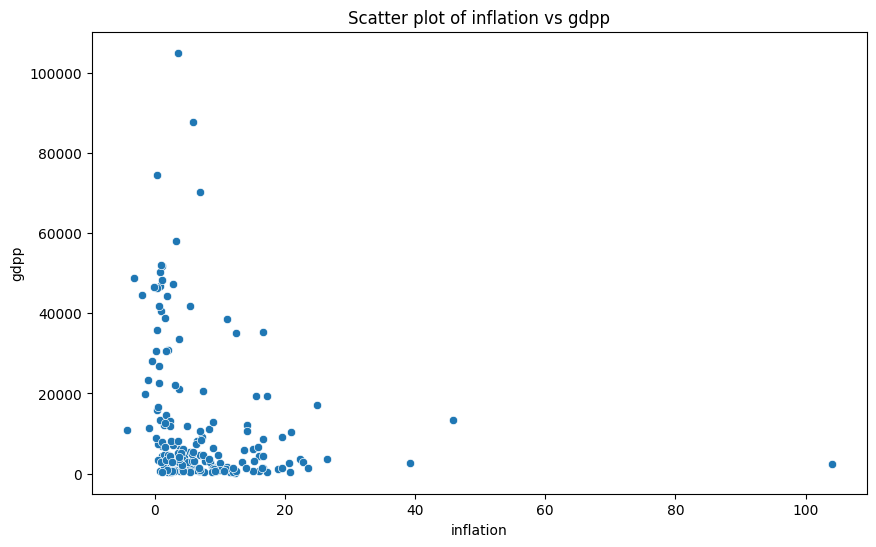

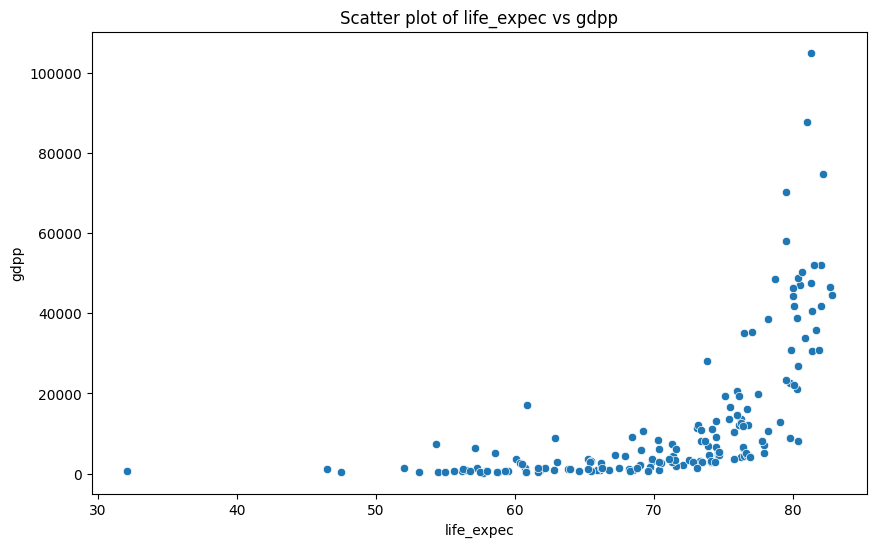

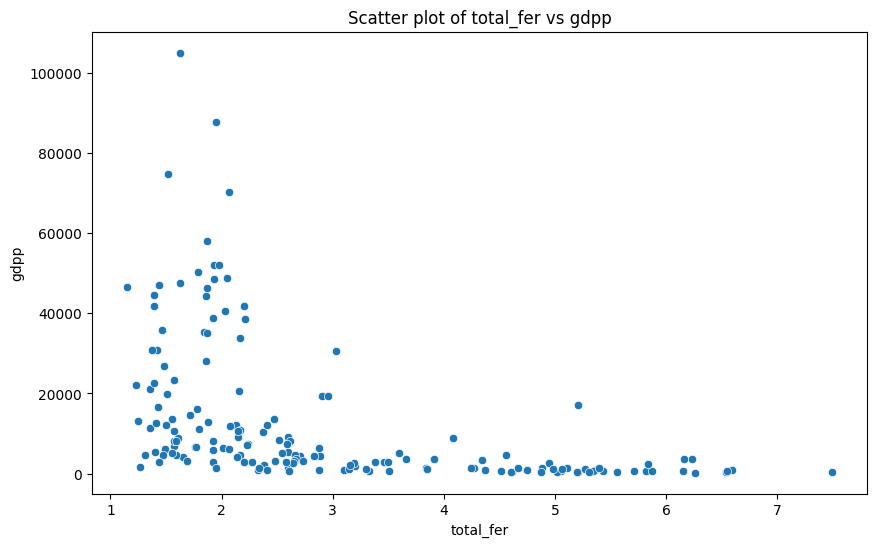

In [11]:
# Explore the continuous independent features against gdpp using scatter plots.

# List of continuous variables to plot against 'gdpp'
continuous_vars = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer']

# Create scatterplots
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=var, y='gdpp')
    plt.title(f'Scatter plot of {var} vs gdpp')
    plt.xlabel(var)
    plt.ylabel('gdpp')
    plt.show()

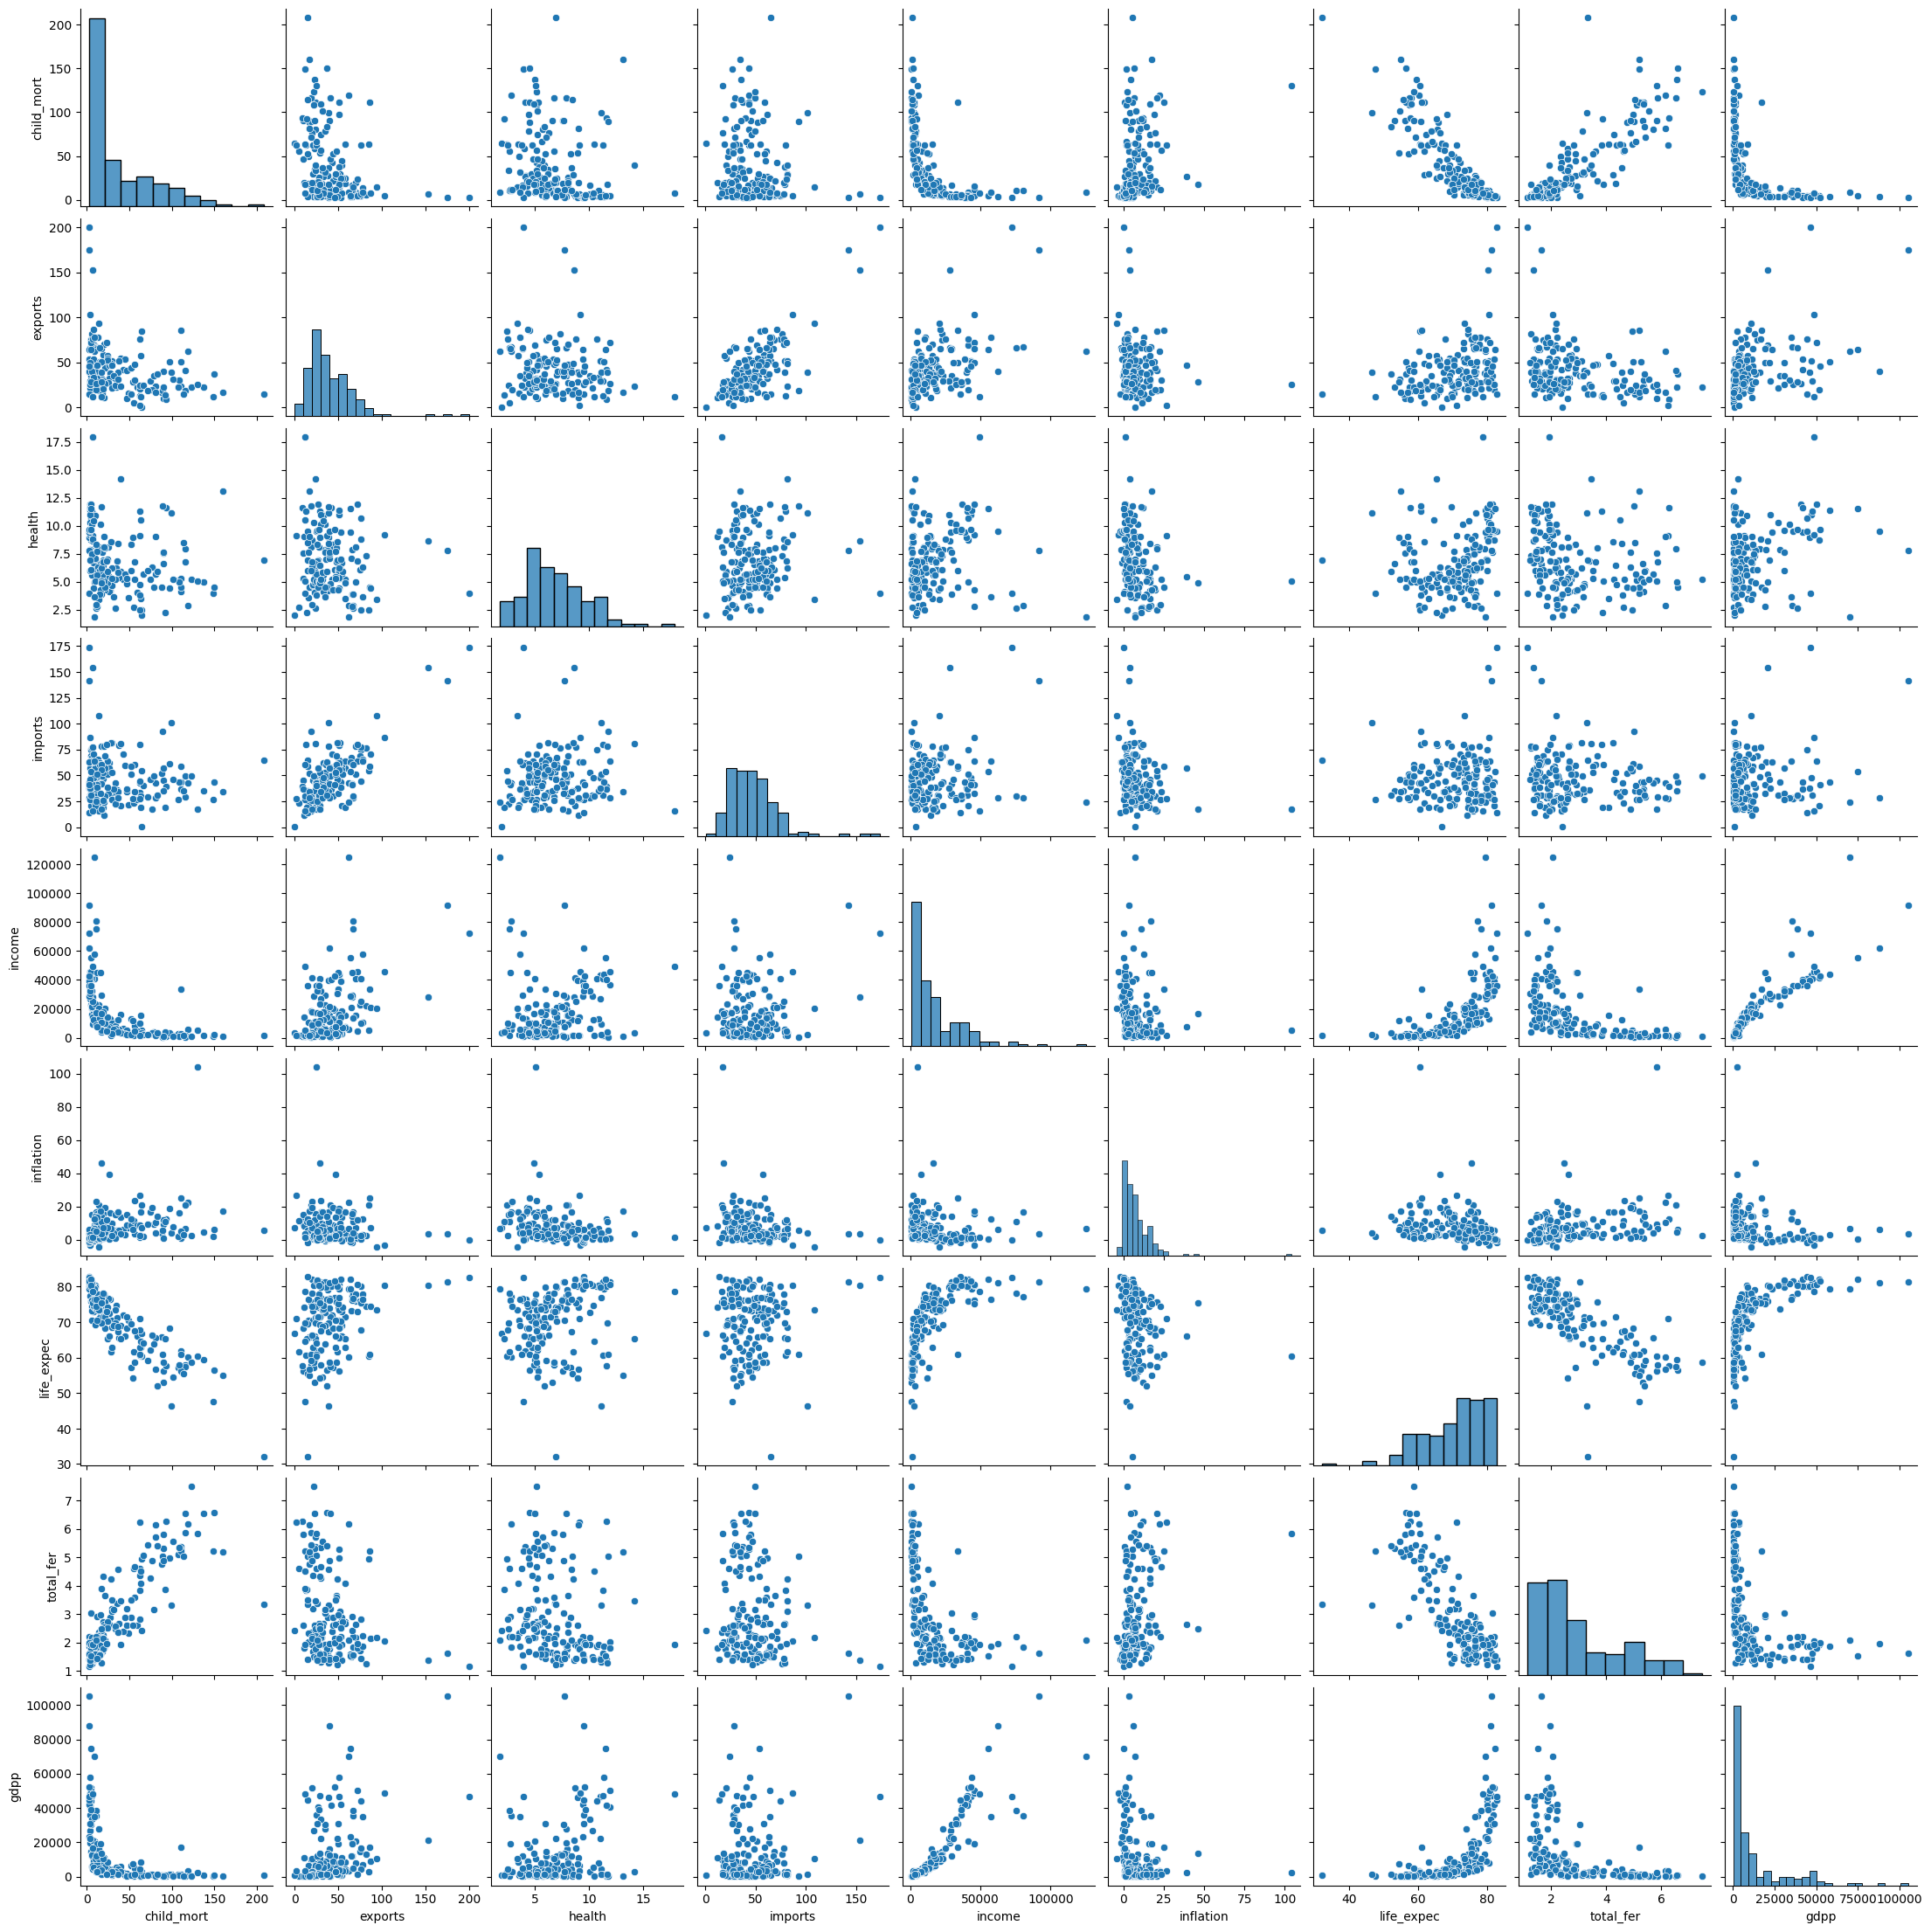

In [12]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.pairplot(df)

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [13]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data (computes the min and max)
scaler.fit(df)

# Transform the data using the scaler
df_scaled = scaler.transform(df)

# Convert the normalized data back to a DataFrame (optional)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Select target columns
data_to_cluster = ['child_mort', 'inflation', 'gdpp']

df_scaled = df_scaled[data_to_cluster]

df_scaled.head()

,child_mort,inflation,gdpp
0,0.426485,0.126144,0.003073
1,0.068160,0.080399,0.036833
2,0.120253,0.187691,0.040365
3,0.566699,0.245911,0.031488
4,0.037488,0.052213,0.114242


## K-Means Clustering

### Selecting K

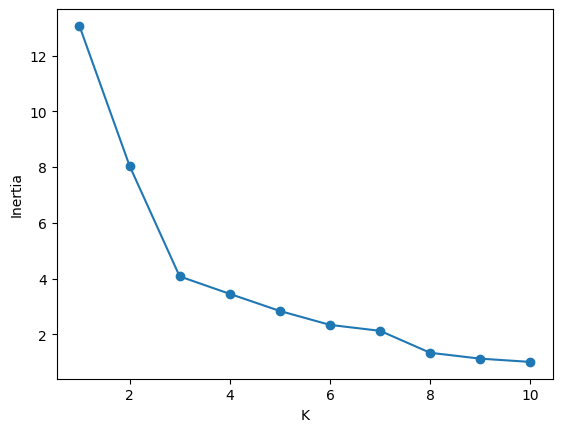

In [14]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset
elbow_Kmeans(df_scaled)

The elbow of the curve is somewhere between 2-5

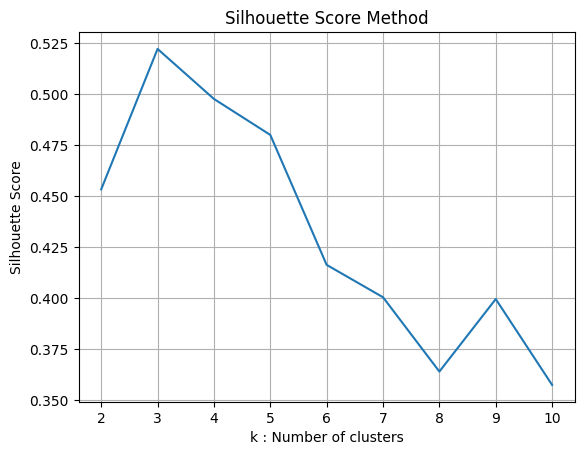

In [15]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

According to the silhouette score K should be 3

## Fitting a K-Means Model with the selected K value

In [16]:
# Remember to set the random_state to rseed
kmeans = KMeans(n_clusters=3, random_state=rseed, max_iter=500)
kmeans.fit(df_scaled)

KMeans(max_iter=500, n_clusters=3, random_state=42)

In [17]:
# Count the number of records in each cluster
labels = kmeans.labels_

cluster_counts = pd.Series(labels).value_counts()

print(cluster_counts)

0    104
2     33
1     30
Name: count, dtype: int64


This tells us that there are 104 records in cluster 0, 30 in cluster 1 and 33 in cluster 2.

In [18]:
# Check model performance with the silhouette coefficient

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, labels)

print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5221329256637437


A silhouette score is between -1 and 1. If the score is above 0.5 this indicates reasonably well defined clusters. This score is just above 0.5 (0.52) and so shows it is a reasonably good model.

## Predictions

In [19]:
# Add the predicted cluster label column to the original dataframe

df['Cluster'] = labels

df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Visualisation of clusters

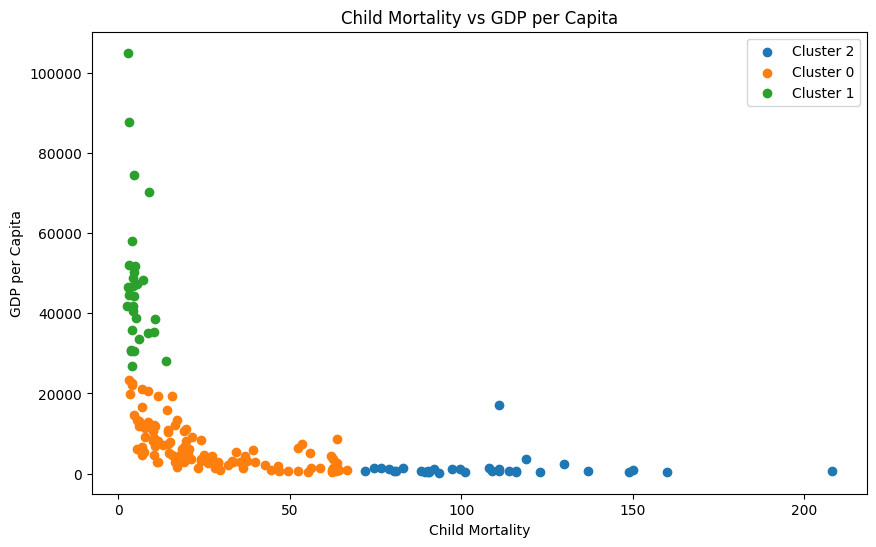

In [20]:
# Visualisation of clusters: child mortality vs gdpp
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['child_mort'], cluster_data['gdpp'], label=f'Cluster {cluster}')

plt.xlabel('Child Mortality')
plt.ylabel('GDP per Capita')
plt.title('Child Mortality vs GDP per Capita')
plt.legend()
plt.show()

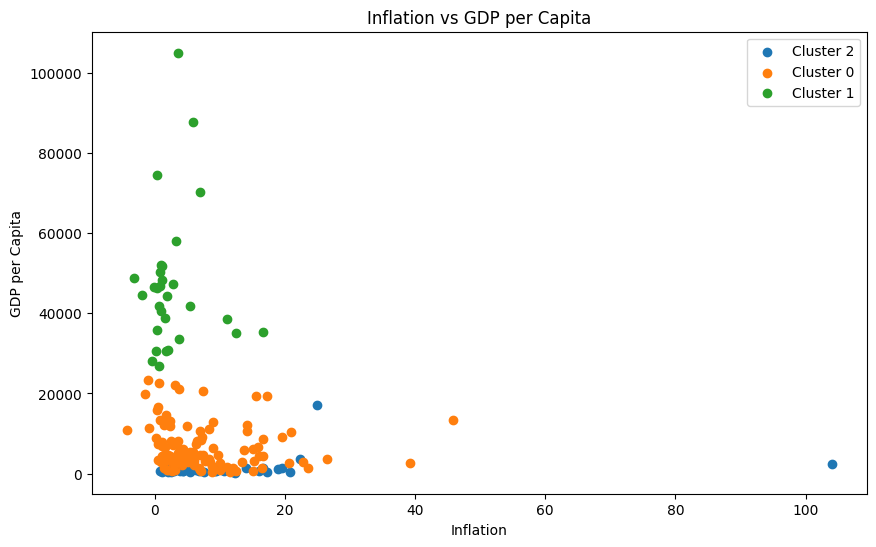

In [21]:
# Visualisation of clusters: inflation vs gdpp

plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['inflation'], cluster_data['gdpp'], label=f'Cluster {cluster}')

plt.xlabel('Inflation')
plt.ylabel('GDP per Capita')
plt.title('Inflation vs GDP per Capita')
plt.legend()
plt.show()

The clusters in this visualisation do not seem so well defined or to help determine what the country clusters may mean.

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

I would label Cluster 0 as 'Developing', Cluster 1 as 'Developed' and Cluster 2 as 'Least Developed'. The 'Least Developed' countries have the highest child mortality and lowest GDP per Capita. The 'Developed' countries have the lowest child mortality and highest GDP per Capita. According to the visualisations above, it was difficult to use 'inflation' as a determining factor in this decision.